# PROJETO 5

Análise Espectral

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

### Simulate AR process

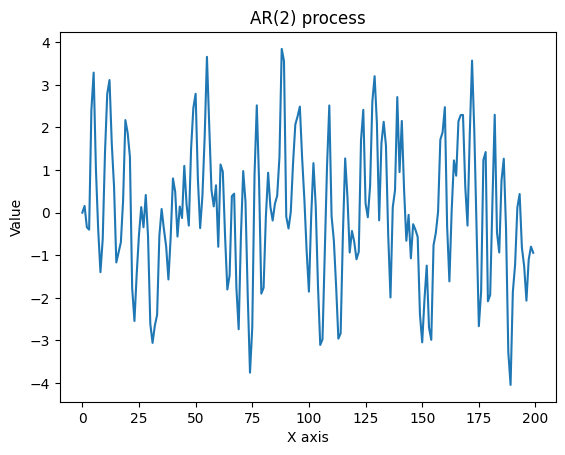

In [2]:
# temporal weighting vector
w = np.array([-.6,.9]) # -2,-1
k = len(w)

N = 200
x = np.zeros(N)

for i in range(k,N):
  x[i] = sum( w*x[i-k:i] ) + np.random.randn()

# add sine wave
x += np.sin(np.linspace(0,10*np.pi,N))

# plot the signal
plt.plot(x)
plt.xlabel('X axis')
plt.ylabel('Value')
plt.title('AR(%g) process'%k)
plt.show()

### Code Fourier Transform

In [3]:
# time vector
t = np.arange(0,N)/N

# initialize Fourier coefficients
fc = np.zeros(N,dtype=complex)

for f in range(N):
  # create complex sine wave
  csw = np.exp(-1j*2*np.pi*f*t)

  # dot product with signal
  fc[f] = np.dot(csw,x)

In [4]:
# check against the fft
fc2 = np.fft.fft(x)

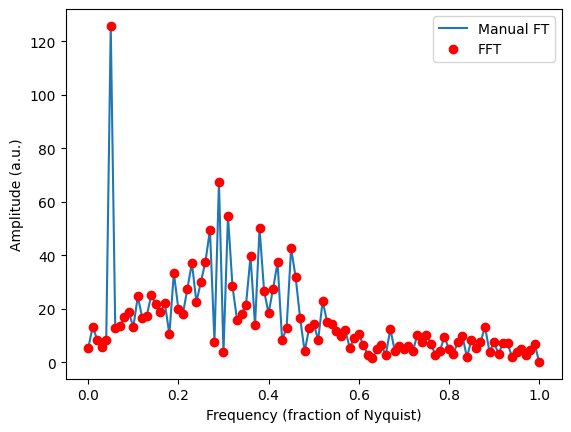

In [5]:
# normalized frequencies vector
hz = np.linspace(0,1,int(N/2+1))

# and plot
plt.plot(hz,np.abs(fc[:len(hz)]),label='Manual FT')
plt.plot(hz,np.abs(fc2[:len(hz)]),'ro',label='FFT')
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.legend()
plt.show()

### Zero padding

In [6]:
# new signal with N=21

w = [.9,.6]
k = len(w)

N = 21
x = np.zeros(N)

for i in range(k,N):
  x[i] = sum( w*x[i-k:i] ) + np.random.randn()

21
31
121


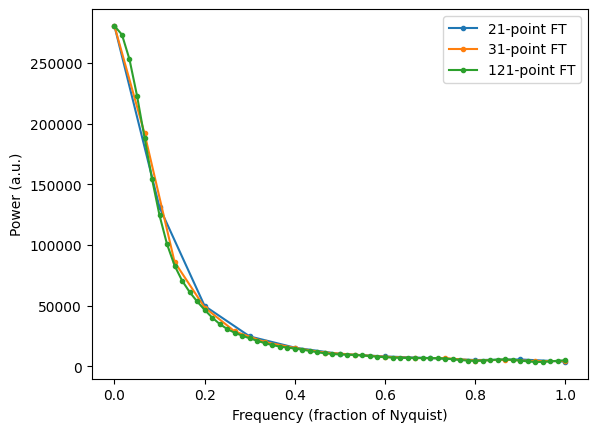

In [7]:
# for-loop to run FFT and plot power spectrum

for i in range(3):
  nfft = N + 10**i * int(i!=0)
  print(nfft)
  xX = np.fft.fft(x,n=nfft)
  
  # normalized frequencies vector
  hz = np.linspace(0,1,int(nfft/2)+1)
  
  # and plot
  plt.plot(hz,np.abs(xX[:len(hz)])**2,'.-',label='%s-point FT'%nfft)
  
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Power (a.u.)')
plt.legend()
plt.show()